<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/make_moons_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import make_moons

In [14]:
X , y = make_moons(
    n_samples = 2000
    )

In [15]:
import pandas as pd
dataset = pd.DataFrame(
   { "X1" : X[ :  , 0] ,
    "X2" : X[ : , 1] ,
    "y" :  y
   }
     )
dataset

,X1,X2,y
0,-0.516251,0.856438,0
1,1.972315,0.266325,1
2,0.066928,0.140311,1
3,0.450204,0.892926,0
4,0.926166,-0.497271,1
...,...,...,...
1995,1.430440,-0.402619,1
1996,0.634317,0.773073,0
1997,1.349397,-0.436975,1
1998,-0.670065,0.742303,0


In [26]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split( X , y  ,  test_size = 0.2 , random_state = 42)

In [20]:
len(X_train) , len(X_test)

(1600, 400)

In [21]:
values = dataset[ "y"].value_counts()
values

0    1000
1    1000
Name: y, dtype: int64

In [30]:
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
normalizer.fit(X_train)

X_train_normalized = normalizer.transform(X_train)
X_test_normalized = normalizer.transform(X_test)
X_train_normalized

array([[0.45956078, 0.95035115],
       [0.61908213, 0.67660248],
       [0.88052724, 0.15529664],
       ...,
       [0.86149076, 0.12572393],
       [0.44801897, 0.16345763],
       [0.09781496, 0.80510882]])

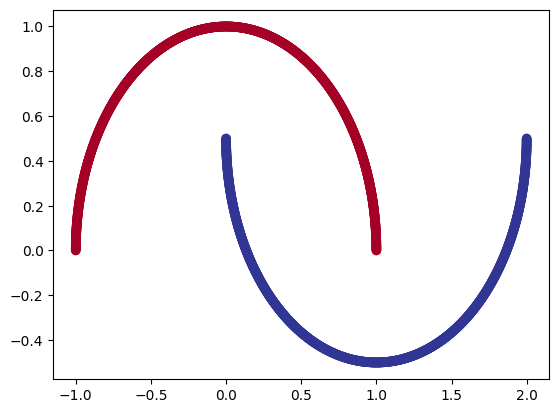

In [32]:
import matplotlib.pyplot as plt
plt.scatter( X[ : , 0] , X[ : , 1] , c = y , cmap = plt.cm.RdYlBu )

In [59]:
import tensorflow as tf
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense( 4, activation = "relu") ,
        tf.keras.layers.Dense( 4, activation = "relu") ,
        tf.keras.layers.Dense(1 , activation = "sigmoid")
    ]
)
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy() ,
    optimizer = tf.keras.optimizers.SGD() ,
    metrics = [ "mae" ]
)
history = model.fit(
    X_train ,
    y_train ,
    epochs = 250 ,
    validation_data = (X_test , y_test)
)

Epoch 1/250
50/50 [==============================] - 1s 11ms/step - loss: 0.7085 - mae: 0.4704 - val_loss: 0.6665 - val_mae: 0.4649
Epoch 2/250
50/50 [==============================] - 0s 6ms/step - loss: 0.6333 - mae: 0.4516 - val_loss: 0.6112 - val_mae: 0.4444
Epoch 3/250
50/50 [==============================] - 0s 5ms/step - loss: 0.5922 - mae: 0.4338 - val_loss: 0.5749 - val_mae: 0.4268
Epoch 4/250
50/50 [==============================] - 0s 3ms/step - loss: 0.5600 - mae: 0.4170 - val_loss: 0.5431 - val_mae: 0.4087
Epoch 5/250
50/50 [==============================] - 0s 3ms/step - loss: 0.5307 - mae: 0.3996 - val_loss: 0.5142 - val_mae: 0.3912
Epoch 6/250
50/50 [==============================] - 0s 3ms/step - loss: 0.5038 - mae: 0.3823 - val_loss: 0.4873 - val_mae: 0.3739
Epoch 7/250
50/50 [==============================] - 0s 3ms/step - loss: 0.4791 - mae: 0.3656 - val_loss: 0.4629 - val_mae: 0.3576
Epoch 8/250
50/50 [==============================] - 0s 3ms/step - loss: 0.4568 - 

In [44]:
model.evaluate(X_test , y_test)

13/13 [==============================] - 0s 2ms/step - loss: 0.0848 - accuracy: 0.9350


[0.0848453938961029, 0.9350000023841858]

In [45]:
model_preds = model.predict(X_test)
model_preds


13/13 [==============================] - 0s 2ms/step


array([[9.94133413e-01],
       [9.99766827e-01],
       [9.97802436e-01],
       [8.37050438e-01],
       [7.99772084e-01],
       [8.19108367e-01],
       [7.49645770e-01],
       [7.89093077e-01],
       [3.10777919e-03],
       [9.93493378e-01],
       [1.66481584e-01],
       [9.99607205e-01],
       [5.87499584e-04],
       [9.08774495e-01],
       [9.99937177e-01],
       [9.98213768e-01],
       [9.75353241e-01],
       [7.54229631e-03],
       [9.99899507e-01],
       [9.99808013e-01],
       [1.02252394e-01],
       [6.61468017e-04],
       [7.48341501e-01],
       [9.99925375e-01],
       [3.84163469e-01],
       [9.99809980e-01],
       [4.99594607e-04],
       [9.99935925e-01],
       [9.98530030e-01],
       [9.95688140e-01],
       [5.63935816e-01],
       [9.71254408e-01],
       [9.77651060e-01],
       [9.99541759e-01],
       [4.54174936e-01],
       [9.99936759e-01],
       [3.09260320e-02],
       [1.11485133e-03],
       [4.13337350e-03],
       [4.35591489e-02],


In [46]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...
313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


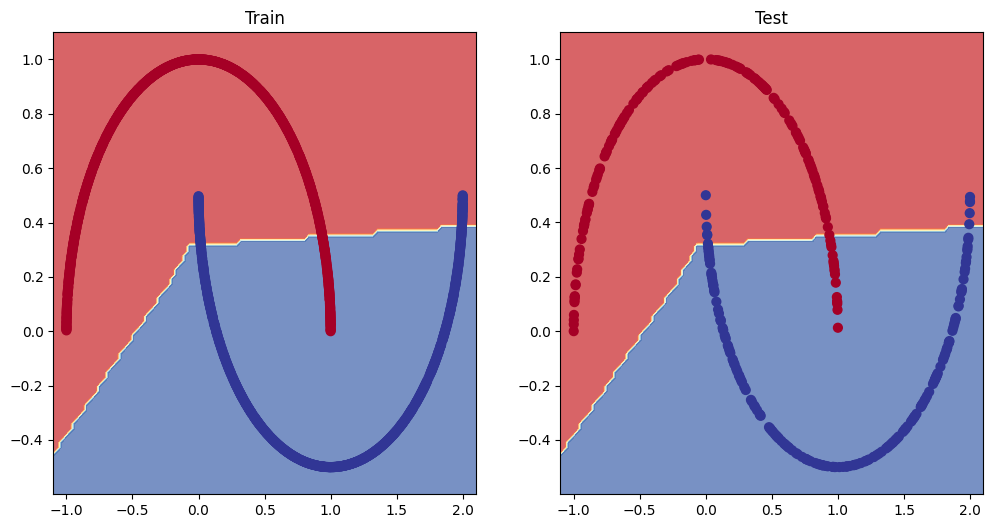

In [62]:
# Plot the decision boundaries for the training and test sets.
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)  #1 row 2 column ve sondaki 1 de 1. plot olacağı
plt.title("Train")
plot_decision_boundary(model , X = X_train  , y  = y_train)

plt.subplot(1,2,2) #2. plot
plt.title("Test")
plot_decision_boundary(model , X = X_test , y = y_test)

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


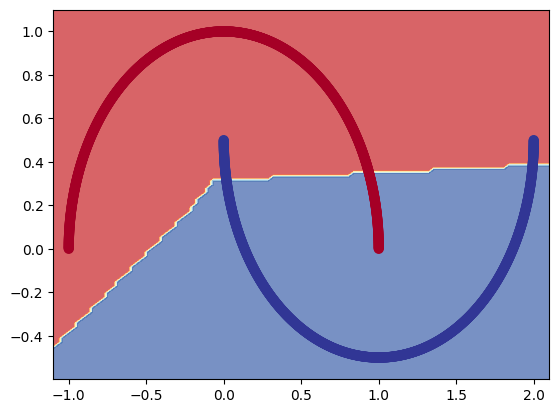

In [60]:
plot_decision_boundary( model , X , y )